In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Input,Dense,Activation,Flatten,MaxPooling2D
from keras.models import Model
from keras.utils import to_categorical
import keras

In [0]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [20]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)


In [25]:
'''
  build a convolutional neural network
'''
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


model.summary()






Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)           

In [26]:
# fit in model and make prediction
model.fit(x_train,y_train,batch_size = 64,epochs=15)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/15





60000/60000 [==============================] - 49s 812us/step - loss: 0.4815 - acc: 0.8271
Epoch 2/15
60000/60000 [==============================] - 47s 781us/step - loss: 0.3248 - acc: 0.8820
Epoch 3/15
60000/60000 [==============================] - 47s 780us/step - loss: 0.2830 - acc: 0.8974
Epoch 4/15
60000/60000 [==============================] - 47s 780us/step - loss: 0.2561 - acc: 0.9078
Epoch 5/15
60000/60000 [==============================] - 47s 792us/step - loss: 0.2357 - acc: 0.9149
Epoch 6/15
60000/60000 [==============================] - 48s 800us/step - loss: 0.2193 - acc: 0.9207
Epoch 7/15
60000/60000 [==============================] - 48s 798us/step - loss: 0.2067 - acc: 0.9249
Epoch 8/15
60000/60000 [==============================] - 47s 792us/step - loss: 0.1942 - acc: 0.9283
Epoch 9/15
60000/60000 [==============================] - 48s 792us/step - loss: 0

In [30]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print('test loss:',test_loss)
print('test accuracy:',test_acc)

10000/10000 [==============================] - 3s 287us/step
test loss: 0.3007565182238817
test accuracy: 0.9029


In [33]:
predictions = model.predict(x_test)
print(x_test)
print(predictions)
print(np.argmax(np.round(predictions[0])))

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

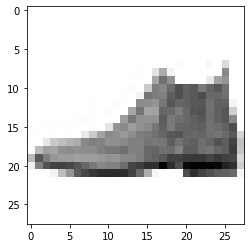

In [35]:
plt.imshow(x_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()